In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data_nona.csv', parse_dates=['date'], index_col=['date'], dayfirst=True)
data.head(3)

,separator_speed_perc_sp,separator_pwr_kw_pv,mill_dp_mbar_pv,total_feed_ton_h_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,fan_speed_rpm_pv,separator_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3_h_pv,...,mill_injection_water_m3_h_pv_5,mill_injection_water_m3_h_pv_6,mill_injection_water_m3_h_pv_7,mill_injection_water_m3_h_pv_8,mill_injection_water_m3_h_pv_9,bucket_elv_mtr_pwr_kw_pv_6,bucket_elv_mtr_pwr_kw_pv_7,bucket_elv_mtr_pwr_kw_pv_8,bucket_elv_mtr_pwr_kw_pv_9,bucket_elv_mtr_pwr_kw_pv_10
date,,,,,,,,,,,,,,,,,,,,,
2019-05-11 03:15:00,42.7,56.98,32.95,83.770,30.150,0.110,952.0,747.190,121.0,2.45,...,2.455,2.46,2.455,2.465,2.460,4.910,4.945,4.975,4.92,4.98
2019-05-11 09:01:00,42.7,56.55,32.65,84.715,30.850,0.080,952.0,747.215,115.5,2.69,...,2.690,2.69,2.690,2.695,2.690,4.765,4.780,4.810,4.79,4.80
2019-05-11 09:02:00,42.7,56.53,32.42,84.795,30.795,0.085,952.0,747.195,121.0,2.69,...,2.695,2.69,2.690,2.690,2.695,4.785,4.765,4.780,4.81,4.79


In [8]:
print(data.shape)

(68967, 81)


Check for missing or null values in the data set. Looks like everything is in place. 

In [9]:
print(data.isnull().any().sum())

0


In [10]:
print(data.dtypes)

separator_speed_perc_sp        float64
separator_pwr_kw_pv            float64
mill_dp_mbar_pv                float64
total_feed_ton_h_pv            float64
fly_ash_1_perc_pv              float64
                                ...   
bucket_elv_mtr_pwr_kw_pv_6     float64
bucket_elv_mtr_pwr_kw_pv_7     float64
bucket_elv_mtr_pwr_kw_pv_8     float64
bucket_elv_mtr_pwr_kw_pv_9     float64
bucket_elv_mtr_pwr_kw_pv_10    float64
Length: 81, dtype: object


In [11]:
correlation = data.corr(method='pearson')

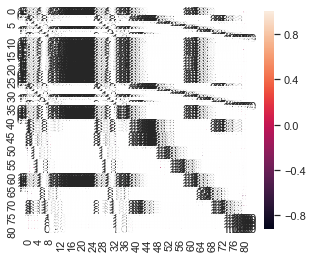

In [14]:
correlation_map = np.corrcoef(correlation)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f')

plt.show()

In [15]:
features = ['mill_dp_mbar_pv_1',
            'mill_dp_mbar_pv_2',
            'mill_dp_mbar_pv_3',
            'mill_dp_mbar_pv_4',
            'mill_dp_mbar_pv_5',
            'total_feed_ton_h_pv_7',
            'total_feed_ton_h_pv_8',
            'total_feed_ton_h_pv_9',
            'total_feed_ton_h_pv_10',
            'total_feed_ton_h_pv_11',
            'total_feed_ton_h_pv_12',
            'fly_ash_1_perc_pv_17', 
            'fly_ash_1_perc_pv_18',
            'fly_ash_1_perc_pv_19',
            'fly_ash_1_perc_pv_20',
            'fly_ash_1_perc_pv_21',
            'fly_ash_1_perc_pv_22',
            'fly_ash_2_perc_pv_17',
            'fly_ash_2_perc_pv_18',
            'fly_ash_2_perc_pv_19',
            'fly_ash_2_perc_pv_20',
            'fly_ash_2_perc_pv_21', 
            'fly_ash_2_perc_pv_22',
            'fan_speed_rpm_pv_5',
            'fan_speed_rpm_pv_6',
            'fan_speed_rpm_pv_7',
            'fan_speed_rpm_pv_8',
            'fan_speed_rpm_pv_9',
            'fan_speed_rpm_pv_10',
            'separator_speed_rpm_pv_3',
            'separator_speed_rpm_pv_4',
            'separator_speed_rpm_pv_5',
            'separator_speed_rpm_pv_6',
            'separator_speed_rpm_pv_7',
            'separator_speed_rpm_pv_8',
            'grinding_pressure_bar_pv_5',
            'grinding_pressure_bar_pv_6',
            'grinding_pressure_bar_pv_7',
            'grinding_pressure_bar_pv_8',
            'grinding_pressure_bar_pv_9',
            'grinding_pressure_bar_pv_10',
            'mill_injection_water_m3_h_pv_4',
            'mill_injection_water_m3_h_pv_5',
            'mill_injection_water_m3_h_pv_6',
            'mill_injection_water_m3_h_pv_7',
            'mill_injection_water_m3_h_pv_8',
            'mill_injection_water_m3_h_pv_9',
            'bucket_elv_mtr_pwr_kw_pv_5',
            'bucket_elv_mtr_pwr_kw_pv_6',
            'bucket_elv_mtr_pwr_kw_pv_7',
            'bucket_elv_mtr_pwr_kw_pv_8',
            'bucket_elv_mtr_pwr_kw_pv_9',
            'bucket_elv_mtr_pwr_kw_pv_10']

X = data[features].values
Y = data['mill_dp_mbar_pv'].values

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.413447 (0.015065)
ScaledLASSO: -1.451822 (0.042630)
ScaledEN: -1.239342 (0.043511)
ScaledKNN: -0.755022 (0.027847)
ScaledCART: -0.874125 (0.037357)
ScaledGBM: -0.429239 (0.016044)


From the output above, it looks like the Gradient Boosting Regressor operforms the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function.

In [22]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.441173 (0.016910) with: {'n_estimators': 50}
-0.429268 (0.016089) with: {'n_estimators': 100}
-0.419476 (0.015658) with: {'n_estimators': 200}
-0.417529 (0.015613) with: {'n_estimators': 300}
-0.416993 (0.015713) with: {'n_estimators': 400}
Best: -0.416993 using {'n_estimators': 400}


The best n_estimator configuration is 400 with the negative mean square error closest to 0. 

## Finalise and validate model 

There's a need to standardise the training and test data before putting them through the GBR model. 

In [23]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

0.40449512133706966


From the mean square error of 0.046 between the prediction outputs vs the test data, the GBR performed well. Important to note that the mean_square_error is calculated using the scaled data. It does not represent the error between the actual house prices and predicted prices. To better appreciate the outcome of the predictions, I look at the raw predicted values and the corresponding test data.

In [24]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,32.680116,32.040
1,34.800289,34.875
2,34.003874,34.085
3,35.892463,35.860
4,33.658534,33.960
5,36.267585,36.065
6,33.972163,33.370
7,37.974832,37.915
8,34.849708,34.550
9,38.374489,38.425
